# (The Loan Data Exploration)
## by (Zhongliang Jiang)

## Preliminary Wrangling

> This is a financial dataset related to the loan, lenders, borrowers, interest rates, and financial records, etc. This dataset belongs to Prosper Marketplace Inc., a San Francisco, California based company specializing in loans at low interest rates to the borrowers. I am going to use the data trying to find the pattern in the Prosper data.

> I am going to use python, a advanced high level programming language of the analysis with the packages include NumPy, Pandas, Matplotlib, and Seaborn.

> The dataset contains 113937 entries with 81 variables. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.dtypes)
#print(loan.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [4]:
# descriptive statistics for numeric variables
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
print(loan.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

***Data Wrangling***
- Check and drop the duplicated data
- Drop the columns which contain more than 80% of missing data
- Check and fix the incorrect data
- Adjust the dataframe to get a tidy set of data

In [6]:
# check the duplicated data
dupl_loan = loan[loan.duplicated()]
dupl_loan

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [9]:
loan['Term'].describe()
#loan. 

count    113937.000000
mean         40.830248
std          10.436212
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

**Missing data distribution**

In [10]:
#

****The first Question****
- Hong long people usually OPT for loan?

***We are going to address the above question with a histogram***

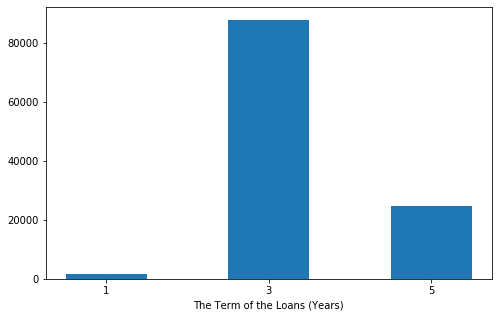

In [11]:
# start with a standard-scaled plot
binsize = 12
bins = np.arange(4, 76, 12)

plt.figure(figsize = [8, 5])
plt.hist(data = loan, x = 'Term', bins = bins)
plt.xticks([10, 34, 58], [1, 3, 5])
plt.xlabel('The Term of the Loans (Years)')
plt.show()

****The conclusions from the chart above:****
- The data shows very few people loan money for less than a year.
- Most popular loan term is 3 years and some people loan for 5 years.

***The cause of the phenomenon observed above:
Hypothesis:

In [12]:
# drop the rows have missing data



### What is the structure of your dataset?

> There are 113937 records of loans in the dataset with 81 features. 61 out of the 81 features are numeric in nature,

### What is/are the main feature(s) of interest in your dataset?

> To identify the variables that will affect the borrower's payment status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

**1.Analyze number of listings in each state**

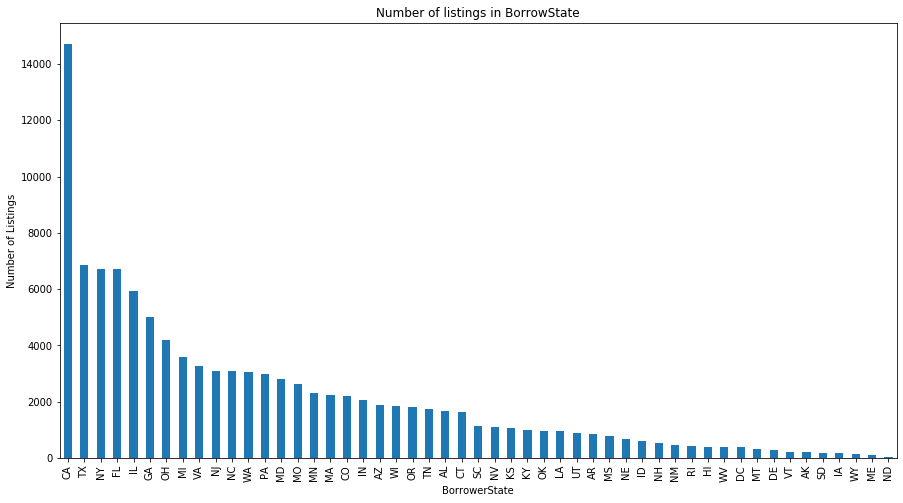

In [15]:
# count each state in the data
state_count = loan.BorrowerState.value_counts();

# plot the bar chart
color_base = sb.color_palette()[0]

plt.figure(figsize = [15, 8])
state_count.plot(kind = 'bar', color = color_base);

plt.title('Number of listings in BorrowState');
plt.xlabel('BorrowerState');
plt.ylabel('Number of Listings');

plt.xticks(rotation = 90);

**Insights**
- The above bar chart indicates the top five listing counts are CA, TX, NY, FL and IL.
- The states with least counts are SD, IA, WY, ME, and ND.
- The prosper loan counts against the states distribution is similar to the population of the US.


**2. Income rate distribution of listings**

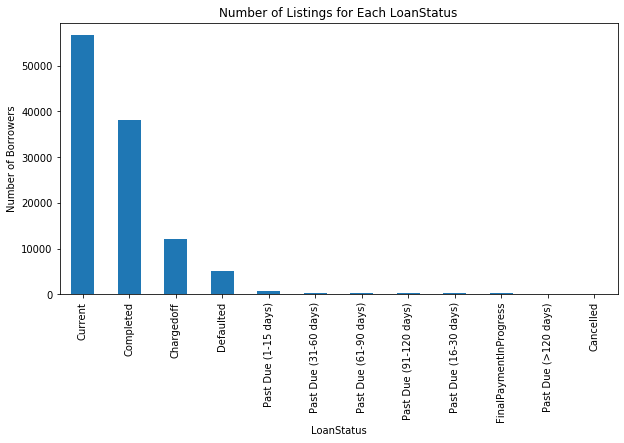

In [16]:
# count the listings under each income range
status_cnt = loan.LoanStatus.value_counts()

# plotting bar chart for each income range specified
plt.figure(figsize = [10, 5])
status_cnt.plot(kind = 'bar', color = color_base)

plt.title('Number of Listings for Each LoanStatus');
plt.xlabel('LoanStatus');
plt.ylabel('Number of Borrowers');

plt.xticks(rotation = 90);

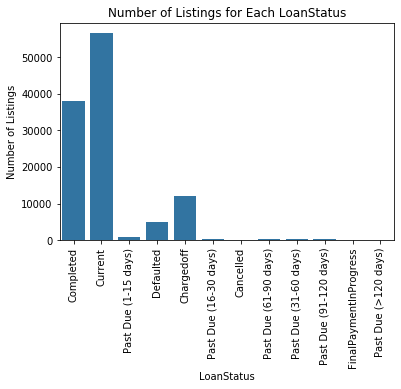

In [17]:
sb.countplot(data = loan, x = 'LoanStatus', color = color_base)

plt.title('Number of Listings for Each LoanStatus');
plt.xlabel('LoanStatus');
plt.ylabel('Number of Listings');

plt.xticks(rotation = 90);

**Insights**
- The number of listings in each LoanStatus type are analyzed and the chart shows that the Current status has got the highest number of listings followed by Completed and Chargedoff.
- Other statuses include dues for various intervals and cancelled whose frequency is too less.

**3. Income rate distribution of listings**

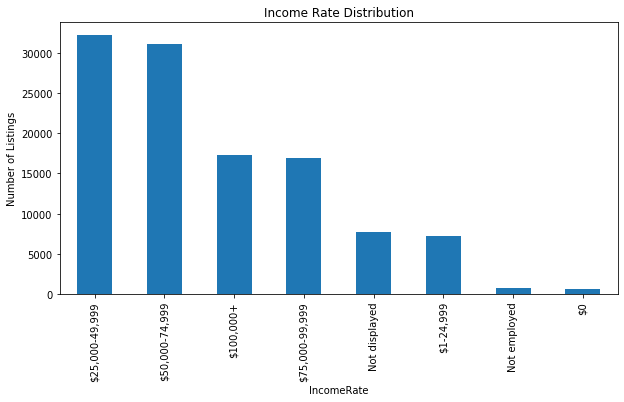

In [19]:
# count of listings under each income range
income_range_cnt = loan.IncomeRange.value_counts()

# plots the bar chart for each income range specified
plt.figure(figsize = [10, 5])
income_range_cnt.plot(kind = 'bar', color = color_base);

plt.title('Income Rate Distribution')
plt.xlabel('IncomeRate')
plt.ylabel('Number of Listings')

plt.xticks(rotation=90);

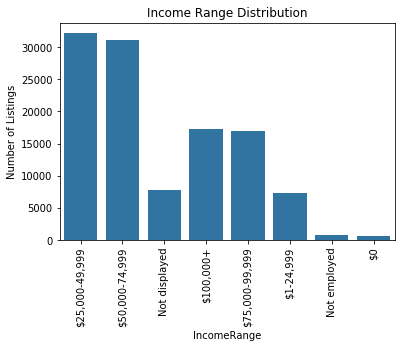

In [20]:
sb.countplot(data = loan, x = 'IncomeRange', color = color_base)

plt.title('Income Range Distribution')
plt.xlabel('IncomeRange')
plt.ylabel('Number of Listings')

plt.xticks(rotation=90);

**Insights**
- The bar chart shows most of the borrowers' income range is between $25,000 to $100,000. But suprisingly, some borrowers without income still got loans.

**4. Distribution of the loan amount**

In [21]:
loan['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

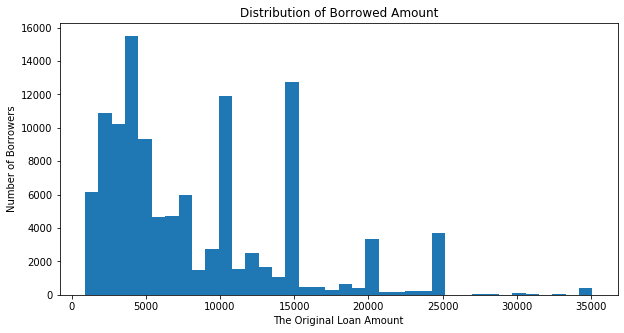

In [24]:
binsize = 900
bins = np.arange(900, loan['LoanOriginalAmount'].max()+binsize, binsize)

# plot the histogram of LoanOriginalAmount 
plt.figure(figsize = [10, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins);

#plt.xticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 350000])

plt.title('Distribution of Borrowed Amount')
plt.xlabel('The Original Loan Amount')
plt.ylabel('Number of Borrowers');

**Insights**
- The borrowed loans ranges from 1000 to 35000
- The most borrowed loans amount was around 4000, with a median of 6500 and mean of 8337.
- The histogram chart is very right skewed indicate it might need a logarithmic transformation.

In [25]:
a = []
b = [5000, 10000, 15000, 20000, 25000, 30000, 35000]
for i in b:
    j = np.log10(i)
    a.append(j)
print(a)

[3.6989700043360187, 4.0, 4.176091259055681, 4.301029995663981, 4.3979400086720375, 4.477121254719663, 4.544068044350276]


In [26]:
np.log10(loan['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

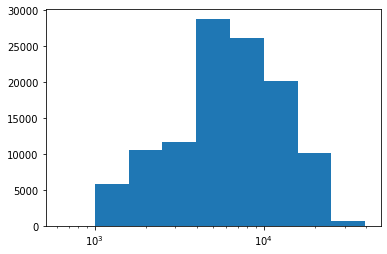

In [28]:
binsize = 0.2
bins = 10 ** np.arange(2.8, 4.5+binsize, binsize)

# plotting
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.xticks = ([3.70, 4, 4,18, 4.30, 4.40, 4.48, 4.54], ['5k', '10k', '15k', '20k', '25k', '30k', '35k'])
plt.xscale('log')


**5. The Distribution of Borrower Rate**

In [29]:
loan['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

Text(0, 0.5, 'Number of listings')

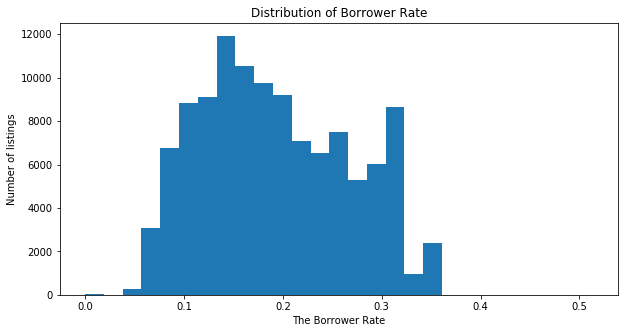

In [30]:
binsize = 0.019
bins = np.arange(0, loan['BorrowerRate'].max()+binsize, binsize)

# plot the histogram of the BorrowerRate
plt.figure(figsize = [10, 5])
plt.hist(data = loan, x = 'BorrowerRate', bins = bins)

#plt.xticks = 

plt.title('Distribution of Borrower Rate')
plt.xlabel('The Borrower Rate')
plt.ylabel('Number of listings')

**Insights**
- The mean borrowing rate was 0.192 with a median of 0.184 on loan amounts.

In [31]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


**6. The Distribution of Listing Category**

Text(0, 0.5, 'Reasons for Loan')

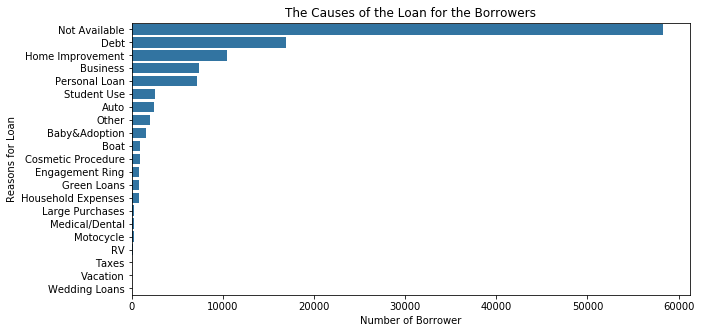

In [32]:
plt.figure(figsize = [10, 5])
# the bar chart of the listing category variables
sb.countplot(data = loan, y = 'ListingCategory (numeric)', color = color_base,
             order = loan['ListingCategory (numeric)'].value_counts().index)

#cat_ticks = {1: ['Debt'], 0: ['Not Available'], 7: ['Other'], 2: ['Home Improvement'], 3: ['Business'],
#             6: ['Auto'], 4: ['Personal Loan'], 13: ['Household Expenses'], 15: ['Medical/Dental'],
#             18: ['Taxes'], 14:['Large Purchases'], 20: ['Wedding Loans'], 19: ['Vacation'],
#             5: ['Student Use'], 16:['Motocycle'], 11: ['Engagement Ring'], 8: ['Baby&Adoption'],
#             10: ['Cosmetic Procedure'], 9: ['Boat'], 12: ['Green Loans'], 17: ['RV']}

ytick_locs = [1, 0, 7, 2, 3, 6, 4, 13, 15, 18, 14, 20, 19, 5, 16, 11, 8, 10, 9, 12, 17]
ytick_sbl = ['Debt', 'Not Available', 'Other', 'Home Improvement', 'Business', 'Auto', 'Personal Loan',
             'Household Expenses', 'Medical/Dental', 'Taxes', 'Large Purchases', 'Wedding Loans',
             'Vacation', 'Student Use', 'Motocycle', 'Engagement Ring', 'Baby&Adoption',
             'Cosmetic Procedure', 'Boat', 'Green Loans', 'RV']
plt.yticks(ytick_locs, ytick_sbl)

plt.title('The Causes of the Loan for the Borrowers')
plt.xlabel('Number of Borrower')
plt.ylabel('Reasons for Loan')

**Insights**
- The other section indicated by number 7 with more than 10000 of the borrowers would remain unknown.
- Why the loan reason would be unknown? Does it indicate any illegal reason to opt for loan? This point needs further investigation.

**To address the unknown loan reason for number 7:**
- We need to take a look at the Occupation and Employment status of the borrowers in the *others* section.

**7. Number of Loans by Year**

In [33]:
loan['LoanOriginationDate'].head()

0    2007-09-12 00:00:00
1    2014-03-03 00:00:00
2    2007-01-17 00:00:00
3    2012-11-01 00:00:00
4    2013-09-20 00:00:00
Name: LoanOriginationDate, dtype: object

In [34]:
# generate a year column by spliting the 'LoanOrignationDate' column


8. The Characteristics of Borrowers can be described by the variables below
* Distribution of CreditScoreRangeUpper
* Distribution of ProsperRatings
* Distribution of Employment Status
* Distribution of Income Range

Text(0, 0.5, 'The Employment Status of Borrower')

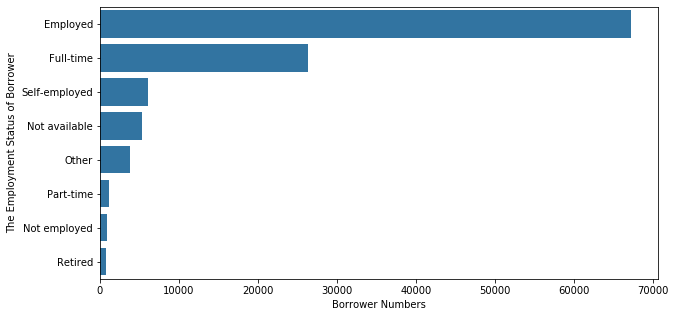

In [35]:
# plotting the EmploymentStatus
plt.figure(figsize = [10, 5])
sb.countplot(data = loan, y = 'EmploymentStatus', color = color_base,
             order = loan['EmploymentStatus'].value_counts().index)

plt.xlabel('Borrower Numbers')
plt.ylabel('The Employment Status of Borrower')

- Most borrowers indicated as 'Employed' and 'Full-Time' as employment status.

**Further investigation on the borrowers insights**
- Employment Status Duration (in months)
- Stated Monthly Income
- Total Prosper Loans


In [36]:
loan['EmploymentStatusDuration'].describe()

count    106312.000000
mean         96.071582
std          94.480605
min           0.000000
25%          26.000000
50%          67.000000
75%         137.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

In [37]:
loan['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

Text(0, 0.5, 'Reasons for Loan')

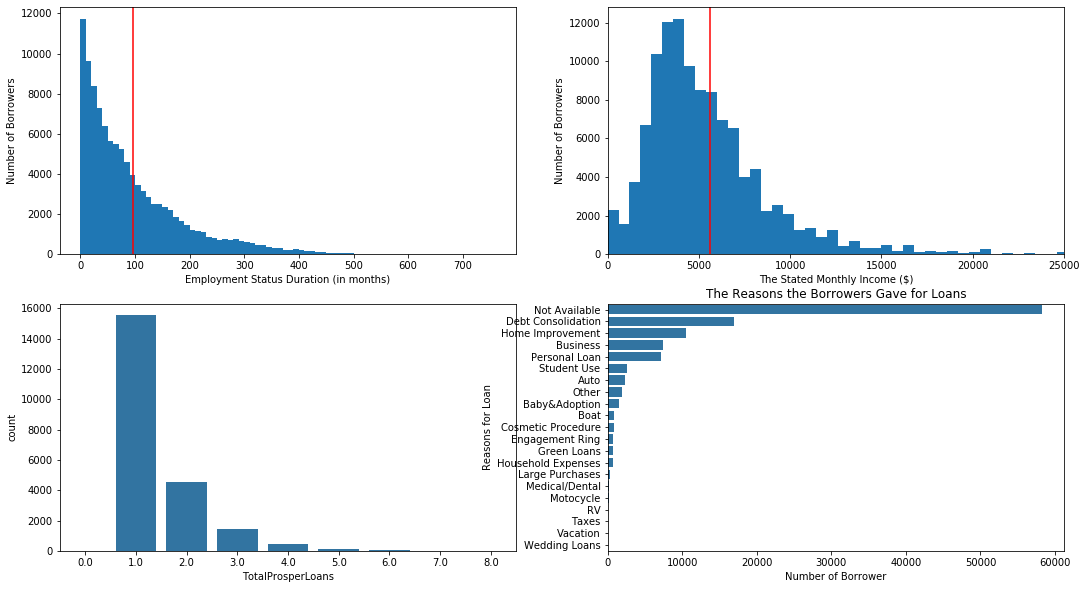

In [38]:
# set a big chart
plt.figure(figsize = [18, 10])

# the top left one, EmploymentStatusDuration
plt.subplot(2, 2, 1)
binsize = 10
bins = np.arange(0, 755+binsize, binsize);
plt.hist(data = loan, x = 'EmploymentStatusDuration', bins = bins, color = color_base);
plt.xlabel('Employment Status Duration (in months)')
plt.ylabel('Number of Borrowers')
plt.axvline(x = 96, color = 'r') # indicate the mean value

# the top right chart, StatedMonthlyIncome
plt.subplot(2, 2, 2)
binsize = 600
bins = np.arange(0, 1750003+binsize, binsize)
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins = bins, color = color_base)
plt.xlim(0, 25000)
plt.xlabel('The Stated Monthly Income ($)')
plt.ylabel('Number of Borrowers')
plt.axvline(x = 5.608026e+03, color = 'r') # the location of the red line indicate the mean value

# the bottom left chart, TotalProsperLoans
plt.subplot(2, 2, 3)
sb.countplot(data = loan, x = 'TotalProsperLoans', color = color_base)

# the bottom right chart, LoanReasons
plt.subplot(2, 2, 4)
sb.countplot(data = loan, y = 'ListingCategory (numeric)', color = color_base,
             order = loan['ListingCategory (numeric)'].value_counts().index)
ytick_locs = [1, 0, 7, 2, 3, 6, 4, 13, 15, 18, 14, 20, 19, 5, 16, 11, 8, 10, 9, 12, 17]
ytick_sbl = ['Debt Consolidation', 'Not Available', 'Other', 'Home Improvement', 'Business', 'Auto', 'Personal Loan',
             'Household Expenses', 'Medical/Dental', 'Taxes', 'Large Purchases', 'Wedding Loans',
             'Vacation', 'Student Use', 'Motocycle', 'Engagement Ring', 'Baby&Adoption',
             'Cosmetic Procedure', 'Boat', 'Green Loans', 'RV']
plt.yticks(ytick_locs, ytick_sbl)

plt.title('The Reasons the Borrowers Gave for Loans')
plt.xlabel('Number of Borrower')
plt.ylabel('Reasons for Loan')
#plt.x

**Insights**
- The average **EmploymentStatusDuration** is about 96 months, equavalent to about 8 years. Besides, majority of the borrowers stated a zero to 200 months (17 years) enmployment duration.
- The average **StatedMonthlyIncome** is slightly higher than 5000 USD. Majority of the borrowers claimed a monthly income below the 5000 USD.
- Most of the borrowers have 1 or 2 prosper loans already indicate most of them used this platform before.
- Most borrowers use the Prosper platform to consolidate their debts, to 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


- There are a number of features in the data set which are interesting to investigate. First, it will be very interesting to further explore the **loan performance** in greater detail. Therefore, I will need to further investigate a number of variables which might influence the loan performance.

- Second, the **actual returns** is a critical variable for the investors and it will eventually determine the success of the Prosper Loan platform. The higher actual returns indicates more investors will be attracted to this platform.

- Third, it will be important to evaluate how the Prosper Loan platform **perform over time** by boserving the critical variables' pattern over the past years.

- Forth, there are some dubious borrowers in the *Others* table. We can see that there are 352 cases where the borrowing reason, EmploymentStatus, Occupation all are *Others* and 95 cases where *Occupation* is left blank.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

First, apply **Scatterplot matrix** to evaluate the numeric variables' potential correlationships. The numeric variables involved here are listed below.


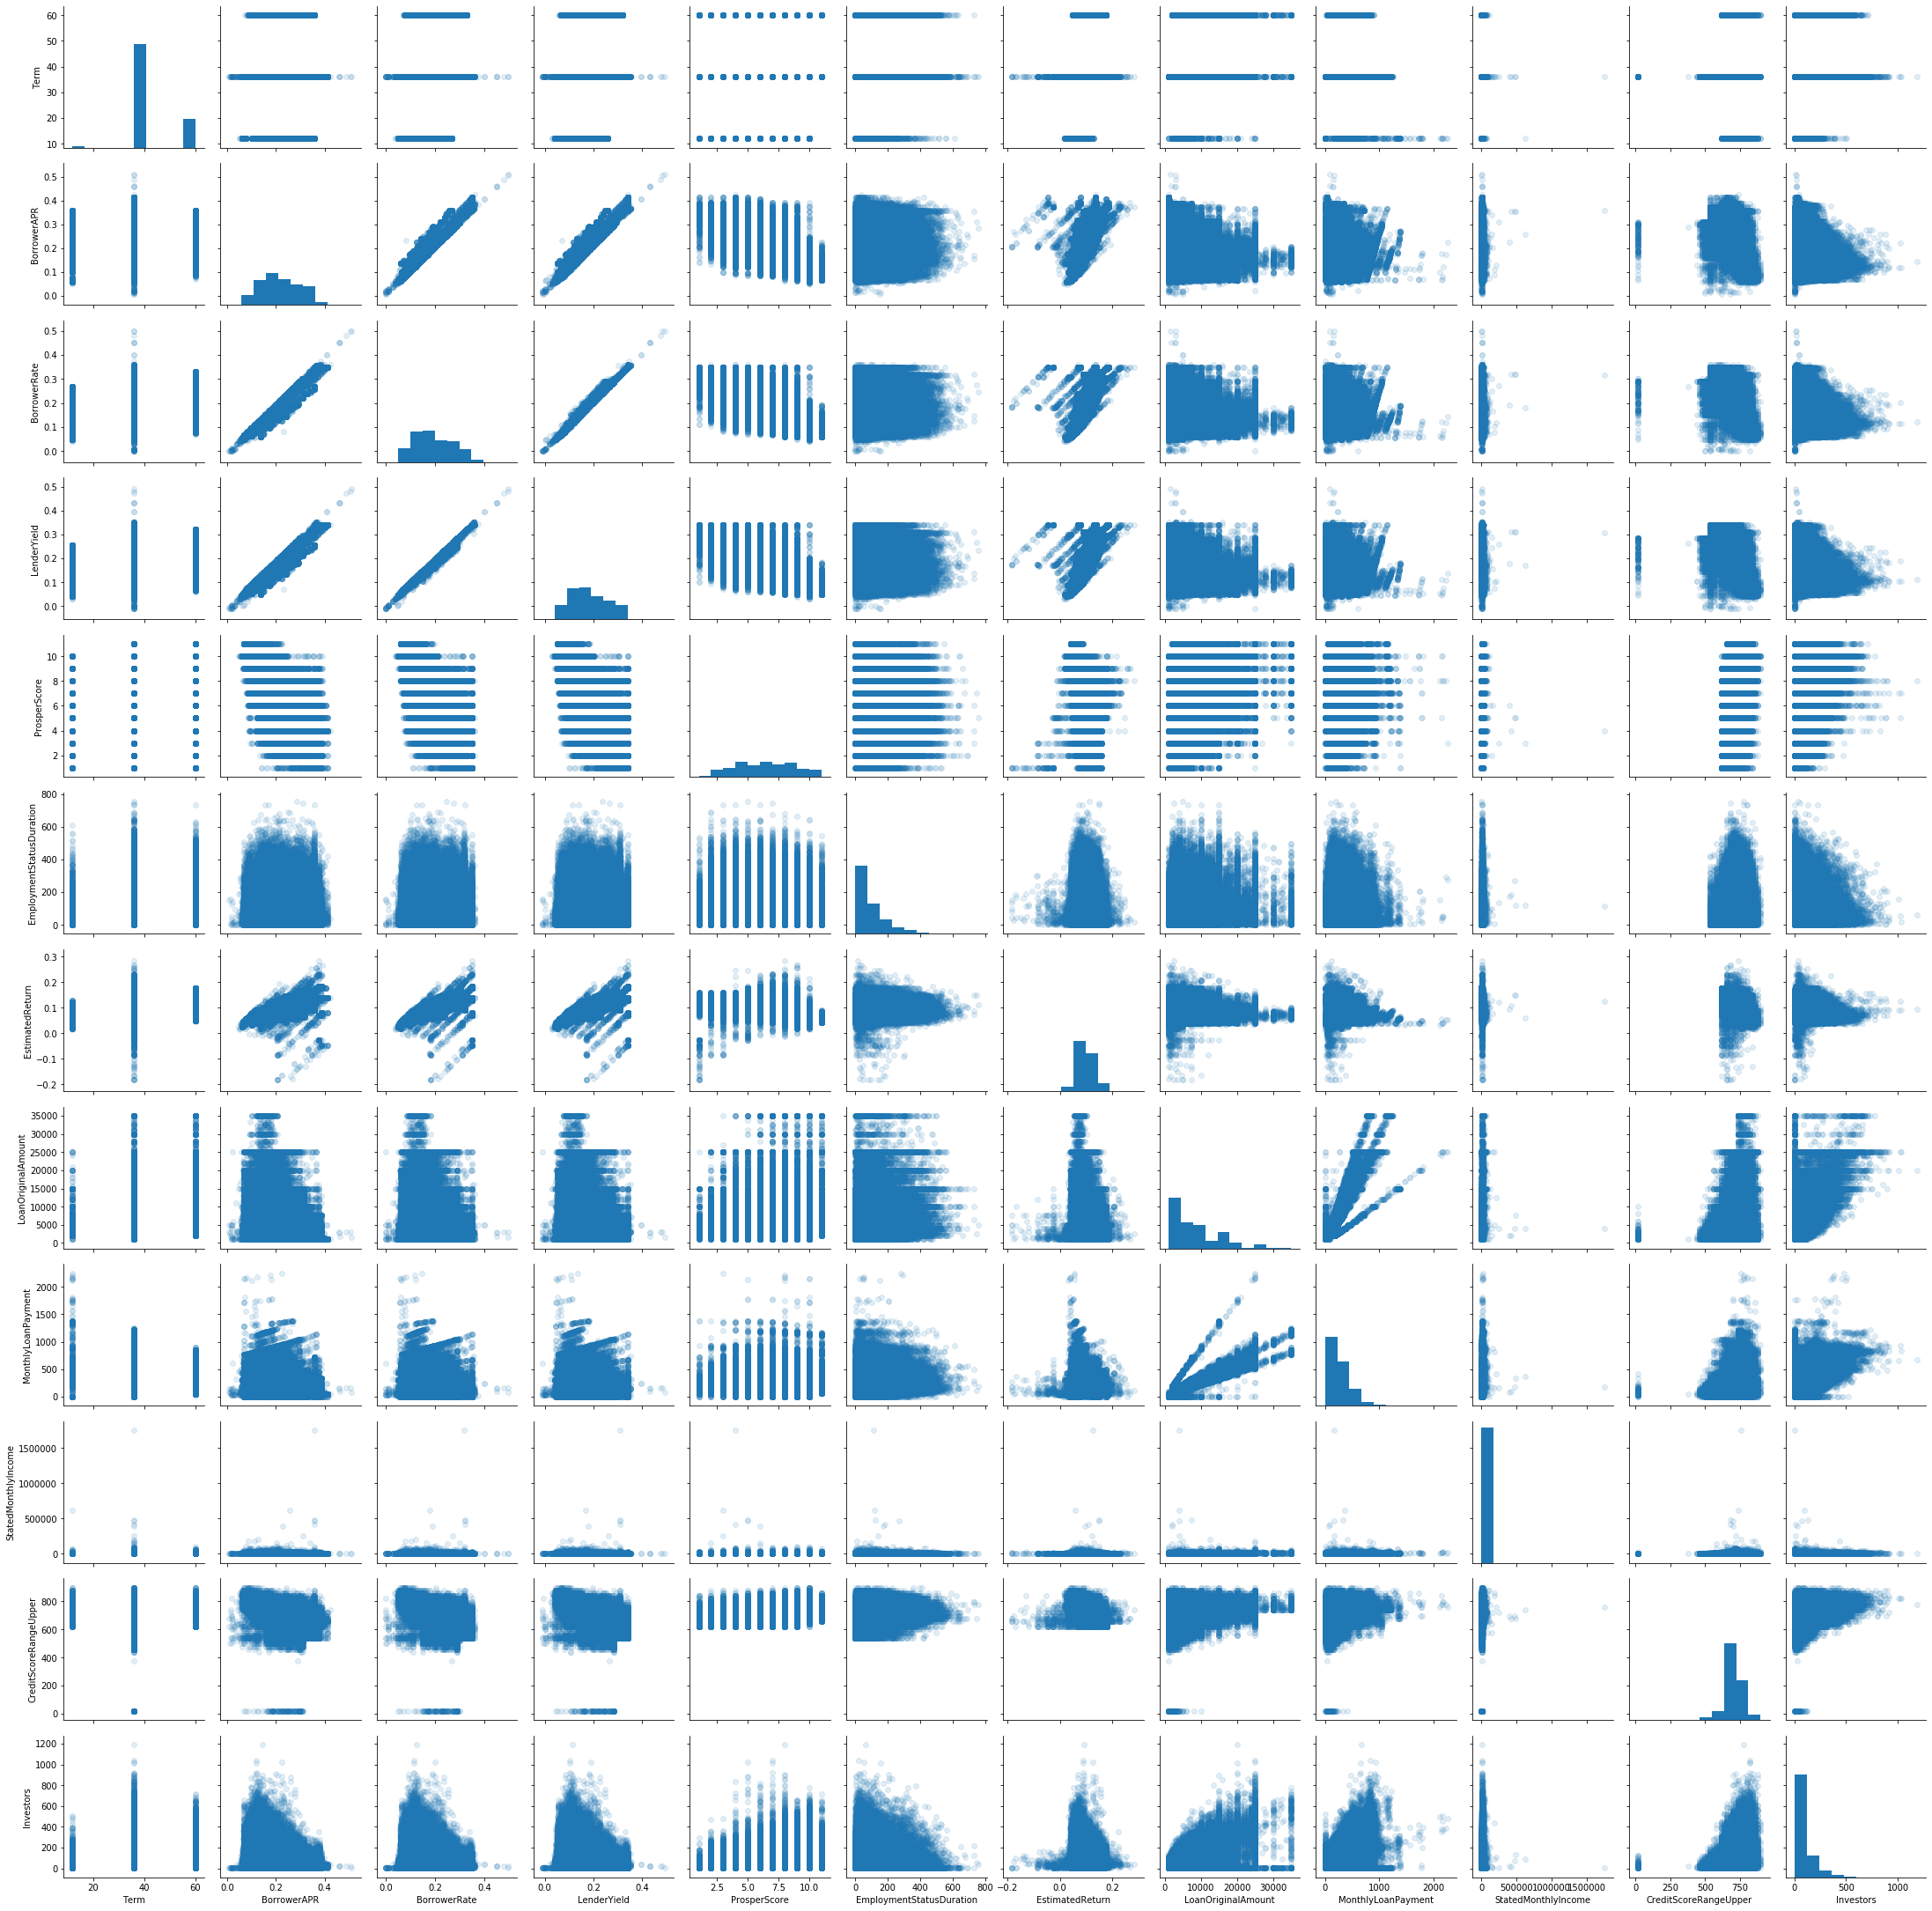

In [41]:
num_vars = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 'EmploymentStatusDuration',
            'EstimatedReturn', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome',
            'CreditScoreRangeUpper', 'Investors']

g = sb.PairGrid(data = loan, vars = num_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 1/8)

**Summary**
- The scatter matrix above provided a big picture of the potential correlationship between each numeric variables involved.
- For the correlated pairs of variables there seem to be some linear relationships.
- However, some relationship are non-linear.
- The messy scatter plots where no obvious relationship can be detected indicate those are uncorrelated variables.

***To get a better understanding of the correlated variables, the variables showed strong correlationship have been replotted below.***


Text(0, 0.5, 'BorrowerRate')

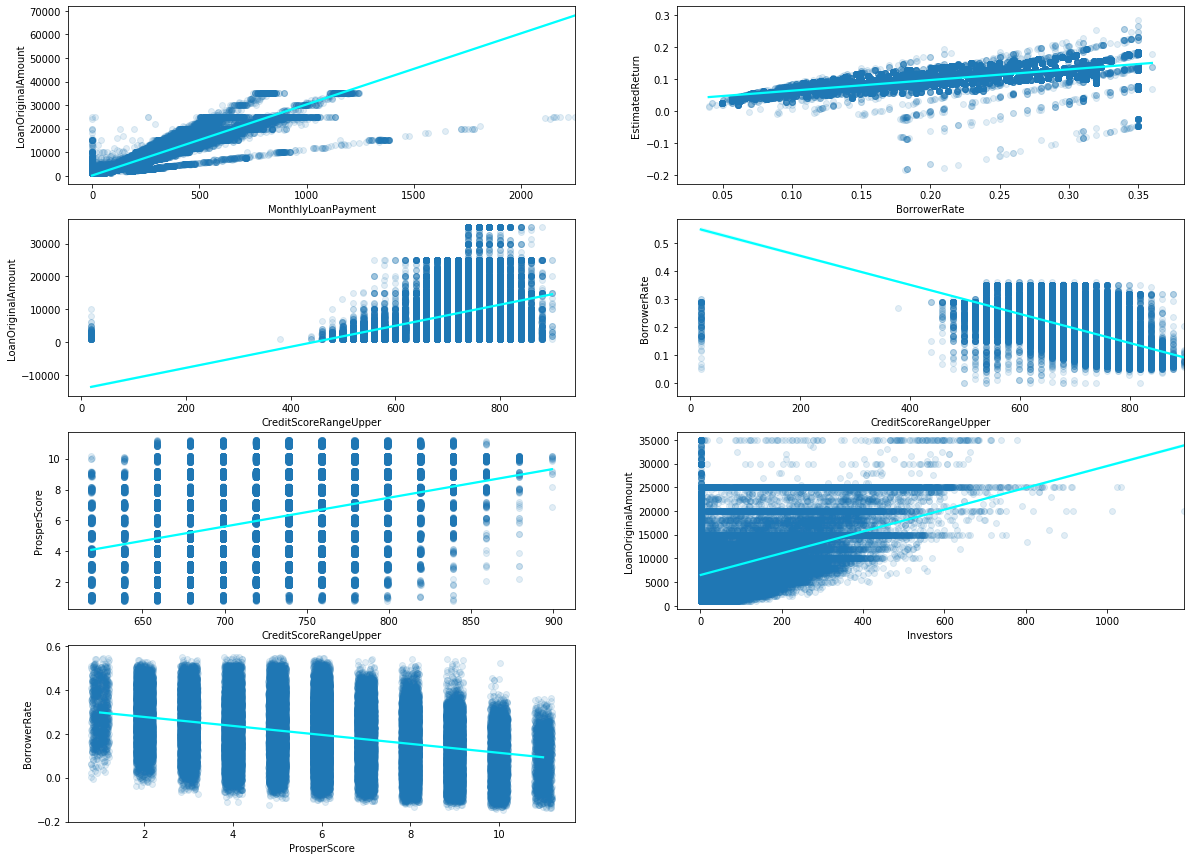

In [44]:
# plot a big chart
plt.figure(figsize = [20, 15])

# MonthlyLoanPayment vs. LoanOriginalAmount
plt.subplot(4, 2, 1)
#sb.set(style = 'white', color_codes = True)
sb.regplot(data = loan, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount',
           scatter_kws = {'alpha' : 1/8}, line_kws = {'color' : 'cyan'})
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('LoanOriginalAmount')

# BorrowerRate vs. EstimatedReturn
plt.subplot(4, 2, 2)
sb.regplot(data = loan, x = 'BorrowerRate', y = 'EstimatedReturn',
           scatter_kws = {'alpha' : 1/8}, line_kws = {'color' : 'cyan'})
plt.xlabel('BorrowerRate')
plt.ylabel('EstimatedReturn')

# CreditScoreRangeUpper vs. LoanOriginalAmount
plt.subplot(4, 2, 3)
sb.regplot(data = loan, x = 'CreditScoreRangeUpper', y = 'LoanOriginalAmount',
            x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/8},
           line_kws = {'color' : 'cyan'})
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('LoanOriginalAmount')

# CreditScoreRangeUpper vs. BorrowerRate
plt.subplot(4, 2, 4)
sb.regplot(data = loan, x = 'CreditScoreRangeUpper', y = 'BorrowerRate',
           scatter_kws = {'alpha' : 1/8}, line_kws = {'color' : 'cyan'})
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('BorrowerRate')

# CreditScoreRangeUpper vs. ProsperScore
plt.subplot(4, 2, 5)
sb.regplot(data = loan, x = 'CreditScoreRangeUpper', y = 'ProsperScore',
            x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/8},
           line_kws = {'color' : 'cyan'})
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('ProsperScore')

# LoanOriginalAmount vs. Investors
plt.subplot(4, 2, 6)
sb.regplot(data = loan, x = 'Investors', y = 'LoanOriginalAmount',
           scatter_kws = {'alpha' : 1/8}, line_kws = {'color' : 'cyan'})
plt.xlabel('Investors')
plt.ylabel('LoanOriginalAmount')

# ProsperScore vs. BorrowerRate
plt.subplot(4, 2, 7)
sb.regplot(data = loan, x = 'ProsperScore', y = 'BorrowerRate',
            x_jitter = 0.2, y_jitter = 0.2,
           scatter_kws = {'alpha' : 1/8}, line_kws = {'color' : 'cyan'})
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerRate')

The exploration of the bivariate relationship above indicate a strong linear and positive relationship between **BorrowerRate** and **EstimatedReturn**. The 

To understand how the ProsperRating system determines categorize the borrowers and whether it is effective in helping the development of Prosper platform, we need to further investigate the relationships between the Prosper evaluation variables like **ProsperRatings** and **ProsperScore**, with variables like **LoanOriginalAmount, CreditScoreRangeUpper, DebtToIncomeRatio, IncomeRanges, BorrowerRate, LenderYield, etc** which can demonstrate how Prosper classify the borrowers, how the different borrowers are treated under the ProsperRating system, and whether this ProperRating system can help to develop the Prosper platform.

***Attention:*** 
>***The necessary data wrangling procedures prior to the data exploration are listed below.***

>*The ProperRating sytem was applied after July 2009, which means the data prior did not exist as they appear as missing data. There was CreditGrate rating data for pre-2009 period. Since most of the records have ProsperRating data (around 8.5k), rows with CreditGrade records will be excluded from this analysis.*

>*The rows missing income range or equal to zero and borrower rate > 0.35 will also be excluded from the analysis below.*

>*The rows missing EmploymentStatus values or have credit score lower than 400 will also be excluded from the analsis.*

In [ ]:
# drop the rows missing ProsperRating system data
loan = loan['']

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!